In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# import results and params
with open('../out/results.json', 'r') as f:
    results = json.load(f)
    
with open('../utils/params.json', 'r') as f:
    params = json.load(f)

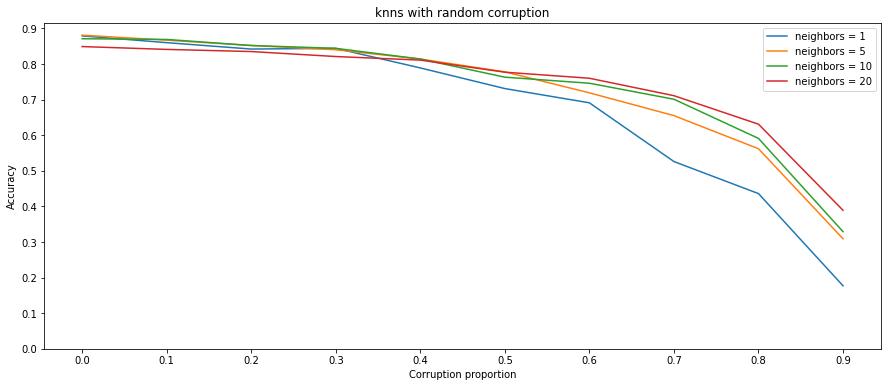

In [6]:
# plot
# DOESNT WORK FOR GAUSS CORRUPTION YET

model_type = 'knn'
corruption_type = 'random'

ind_results = results[model_type][corruption_type]

fig, axes = plt.subplots(1, 1, figsize = (15, 6))

legend = []

for key in ind_results:
    axes.plot(params['corruption_levels'], ind_results[key])
    if model_type == 'kernel':
        legend.append(f'power = {key}')
    elif model_type == 'forest':
        legend.append(f'num trees = {key}')
    elif model_type == 'knn':
        legend.append(f'neighbors = {key}')

axes.legend(legend)
axes.set_xticks(params['corruption_levels'])
axes.set_yticks(np.arange(0, 1.0, 0.1))
axes.set_xlabel('Corruption proportion')
axes.set_ylabel('Accuracy')
_ = axes.set_title(f'{model_type}s with {corruption_type} corruption')
fig.savefig(f'../out/{model_type}_{corruption_type}.png', bbox_inches='tight')